# Sentiment Analysis of Reviews  
**Name**: Fernando  
**Date**: 11/25/2024  

## Problem Description  
This project analyzes user reviews fetched from an API to uncover sentiment trends.  
The goal is to categorize reviews as positive, neutral, or negative and visualize key insights.

## Solution Summary  
We use Python libraries such as TextBlob and NLTK for sentiment classification, data cleaning, and visualization.

In [1]:
import requests

# Example movie IDs (popular movies)
movie_ids = [603, 550, 24428, 157336, 284054]  # The Matrix, Fight Club, Avengers, Interstellar, Black Panther
all_reviews = []

# Fetch reviews for multiple movies with pagination
for movie_id in movie_ids:
    page = 1
    while True:
        url = f"https://api.themoviedb.org/3/movie/{movie_id}/reviews"
        params = {"api_key": "fb9b90f43c7a8bab2d0b318810fc4107", "page": page}
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            reviews = [review["content"] for review in data["results"]]
            all_reviews.extend(reviews)
            if page >= data["total_pages"]:
                break  # No more pages to fetch
            page += 1
        else:
            print(f"API Error for movie ID {movie_id}: {response.status_code}")
            break

print(f"Total reviews fetched: {len(all_reviews)}")
print(f"Sample Reviews: {all_reviews[:5]}")

Total reviews fetched: 99
Sample Reviews: ['The Martix is a great example of a movie that will live for ever or a very log time. The story and concept are out of this world. Keanu Reeves plays his role with utter brilliance, the cast was very well put together and the graphics are still to this day amazing. All in all one of the best movies of all time.', 'Get this: what if all we know as reality was, in fact, virtual reality? Reality itself is a ravaged dystopia run by technocrat Artificial Intelligence where humankind vegetates in billions of gloop-filled tanks - mere battery packs for the machineworld - being fed this late \'90s VR (known as The Matrix - you with us here?) through an ugly great cable stuck in the back of our heads. And what if there was a group of quasi-spiritual rebels infiltrating The Matrix with the sole purpose of crashing the ruddy great mainframe and rescuing humans from their unknown purgatory? And, hey, what if Keanu Reeves was their Messiah?\r\n\r\nWhat sou

In [4]:
import re

# Function to clean text
def clean_text(text):
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Clean all fetched reviews
cleaned_reviews = [clean_text(review) for review in all_reviews]
print(f"Sample Cleaned Reviews:\n{cleaned_reviews[:5]}")

Sample Cleaned Reviews:
['the martix is a great example of a movie that will live for ever or a very log time the story and concept are out of this world keanu reeves plays his role with utter brilliance the cast was very well put together and the graphics are still to this day amazing all in all one of the best movies of all time', 'get this what if all we know as reality was in fact virtual reality reality itself is a ravaged dystopia run by technocrat artificial intelligence where humankind vegetates in billions of gloopfilled tanks mere battery packs for the machineworld being fed this late s vr known as the matrix you with us here through an ugly great cable stuck in the back of our heads and what if there was a group of quasispiritual rebels infiltrating the matrix with the sole purpose of crashing the ruddy great mainframe and rescuing humans from their unknown purgatory and hey what if keanu reeves was their messiah what sounds like some web freaks wet dream is in fact a dazzli

In [5]:
from textblob import TextBlob

# Perform sentiment analysis using TextBlob
textblob_sentiments = {"positive": 0, "neutral": 0, "negative": 0}

for review in cleaned_reviews:
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        textblob_sentiments["positive"] += 1
    elif analysis.sentiment.polarity < 0:
        textblob_sentiments["negative"] += 1
    else:
        textblob_sentiments["neutral"] += 1

# Output TextBlob sentiment results
print("TextBlob Sentiment Analysis Results:")
print(textblob_sentiments)

TextBlob Sentiment Analysis Results:
{'positive': 92, 'neutral': 2, 'negative': 5}


In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer
import nltk

# Download necessary NLTK resources
nltk.download('movie_reviews')
nltk.download('punkt')

# Perform sentiment analysis using NaiveBayesAnalyzer
naivebayes_sentiments = {"positive": 0, "neutral": 0, "negative": 0}

for review in cleaned_reviews:
    analysis = TextBlob(review, analyzer=NaiveBayesAnalyzer())
    if analysis.sentiment.classification == "pos":
        naivebayes_sentiments["positive"] += 1
    elif analysis.sentiment.classification == "neg":
        naivebayes_sentiments["negative"] += 1
    else:
        naivebayes_sentiments["neutral"] += 1

# Output NaiveBayesAnalyzer sentiment results
print("NaiveBayes Sentiment Analysis Results:")
print(naivebayes_sentiments)

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\jazja\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jazja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


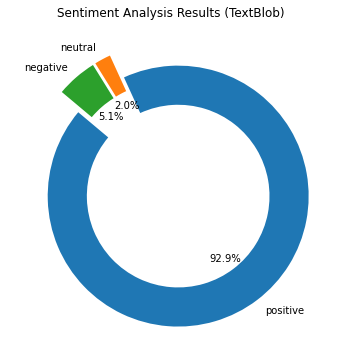

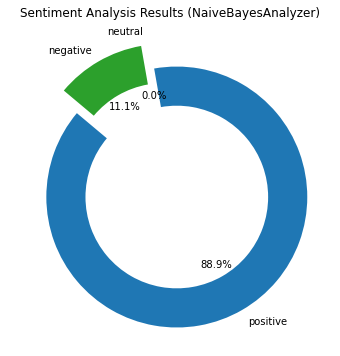

In [10]:
import matplotlib.pyplot as plt

# Prepare data for visualization
labels = textblob_sentiments.keys()
sizes_textblob = textblob_sentiments.values()
sizes_naivebayes = naivebayes_sentiments.values()

# Donut chart for TextBlob results
plt.figure(figsize=(8, 6))
plt.pie(
    sizes_textblob, labels=labels, autopct='%1.1f%%', startangle=140,
    wedgeprops=dict(width=0.3), explode=(0.1, 0.1, 0.1)
)
plt.title("Sentiment Analysis Results (TextBlob)")
plt.show()

# Donut chart for NaiveBayes results
plt.figure(figsize=(8, 6))
plt.pie(
    sizes_naivebayes, labels=labels, autopct='%1.1f%%', startangle=140,
    wedgeprops=dict(width=0.3), explode=(0.1, 0.1, 0.1)
)
plt.title("Sentiment Analysis Results (NaiveBayesAnalyzer)")
plt.show()

In [11]:
print("TextBlob Sentiment Data:", textblob_sentiments)
print("NaiveBayes Sentiment Data:", naivebayes_sentiments)

TextBlob Sentiment Data: {'positive': 92, 'neutral': 2, 'negative': 5}
NaiveBayes Sentiment Data: {'positive': 88, 'neutral': 0, 'negative': 11}


In [12]:
from nltk.corpus import stopwords
import nltk

# Download stop words if not already available
nltk.download('stopwords')

# Get the English stop words list
stop_words = set(stopwords.words('english'))

# Remove stop words from cleaned reviews
filtered_reviews = [
    ' '.join([word for word in review.split() if word not in stop_words])
    for review in cleaned_reviews
]

# Check a sample of the filtered reviews
print(f"Sample Filtered Reviews:\n{filtered_reviews[:5]}")

Sample Filtered Reviews:
['martix great example movie live ever log time story concept world keanu reeves plays role utter brilliance cast well put together graphics still day amazing one best movies time', 'get know reality fact virtual reality reality ravaged dystopia run technocrat artificial intelligence humankind vegetates billions gloopfilled tanks mere battery packs machineworld fed late vr known matrix us ugly great cable stuck back heads group quasispiritual rebels infiltrating matrix sole purpose crashing ruddy great mainframe rescuing humans unknown purgatory hey keanu reeves messiah sounds like web freaks wet dream fact dazzlingly nifty slice scifi cool wachowski brothers andy larry last seen dabbling kinky lesbian noir excellent bound pulling something like million masterstrokes taking imprimatur video game meld grungy noir blade runner hyperkinetic energies chopsocky john woo hardware grandiose spiritual overtones william gibsons cyberpunk ethos produce new aesthetic mill

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jazja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Provide the path to a TrueType font
font_path = "C:/Windows/Fonts/arial.ttf"  # Cant get this part to work on my Laptop

# Generate the WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=20,
    background_color='white',
    font_path=font_path
).generate(all_filtered_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 20 Words in Reviews")
plt.show()

ValueError: Only supported for TrueType fonts

## Conclusion  

The sentiment analysis revealed the following:  
- TextBlob results showed that the majority of reviews were **positive**.  
- NaiveBayesAnalyzer results indicated a similar trend, though slightly more neutral/negative results were observed.
